In [44]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt


In [45]:
df_q1 = pd.read_csv('Q1.csv')
df_q2 = pd.read_csv('Q2.csv')
df_q3 = pd.read_csv('Q3.csv')
df_q4 = pd.read_csv('Q4.csv')

## Plotting for query 1


In [46]:
# Group the data by category_name and sum the rental_count
grouped_df_q1 = df_q1.groupby("category_name")["rental_count"].sum() 

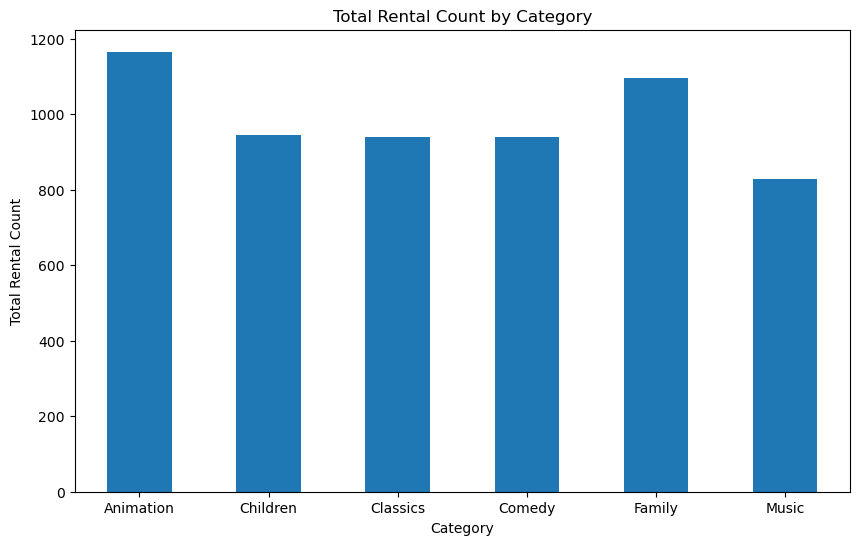

In [47]:
# Plotting a bar graph of the data
plt.figure(figsize=(10, 6))
grouped_df_q1.plot(kind='bar', x='category_name', y='rental_count')

plt.xlabel('Category')
plt.xticks(rotation=0) 
plt.ylabel('Total Rental Count')
plt.title('Total Rental Count by Category')

plt.show()


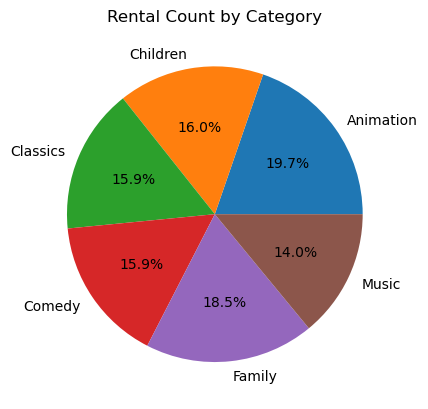

In [48]:
# Plotting a pie chart  of the data

plt.pie(grouped_df_q1, labels= grouped_df_q1.index, autopct ='%1.1f%%')
plt.title('Rental Count by Category')

plt.show()

## Plotting for query 2


In [50]:
df_q2['rental_month'] = pd.to_datetime(df_q2['rental_month'])

# Extract month from 'rental_month' column
df_q2['month'] = df_q2['rental_month'].dt.month
df_q2['year'] = df_q2['rental_month'].dt.year
df_q2['month-year'] = df_q2['rental_month'].dt.to_period('M')

#df_q2_sorted = df_q2.sort_values(by='month', 'year')
df_q2_sorted = df_q2.sort_values(by=['year', 'month'], ascending=True)

print(df_q2_sorted)

  rental_month city_with_most_rentals  num_rentals month-year  month  year
0   2005-05-01              Woodridge          581    2005-05      5  2005
1   2005-06-01              Woodridge         1190    2005-06      6  2005
2   2005-07-01              Woodridge         3375    2005-07      7  2005
3   2005-08-01              Woodridge         2885    2005-08      8  2005


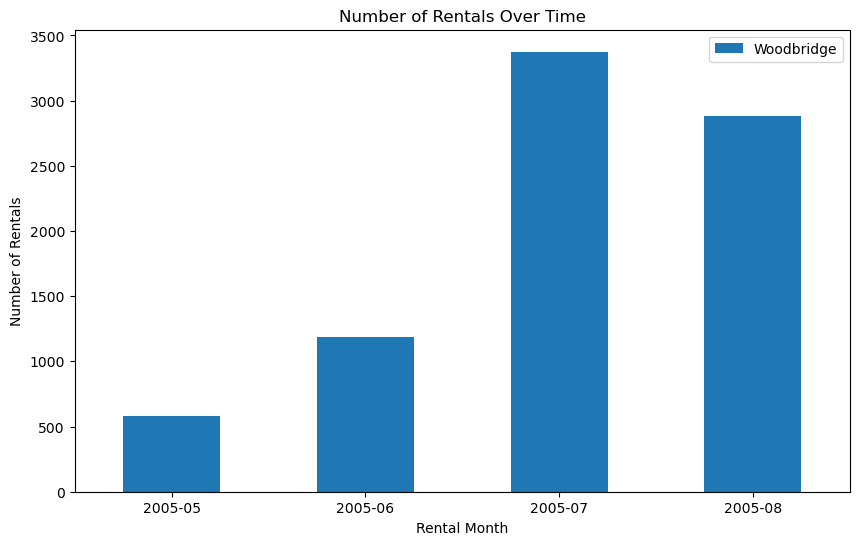

In [51]:
df_q2_sorted.plot(x='month-year', y='num_rentals', kind='bar', figsize=(10, 6))

plt.xlabel('Rental Month')
plt.ylabel('Number of Rentals')
plt.title('Number of Rentals Over Time')

plt.xticks(rotation=0)  # Rotate x-axis labels to horizontal

# Customize legend
plt.legend(["Woodbridge"], loc="upper right")

plt.show()

## Plotting for query 3


In [52]:
# Separate DataFrame for store 1
df_q3_store1 = df_q3[df_q3['store_id'] == 1]

# Separate DataFrame for store 2
df_q3_store2 = df_q3[df_q3['store_id'] == 2]

In [53]:
df_q3_store2

,rental_month,rental_year,store_id,count_rentals
0,7,2005,2,3375
2,8,2005,2,2885
4,6,2005,2,1190
6,5,2005,2,581
9,2,2006,2,90


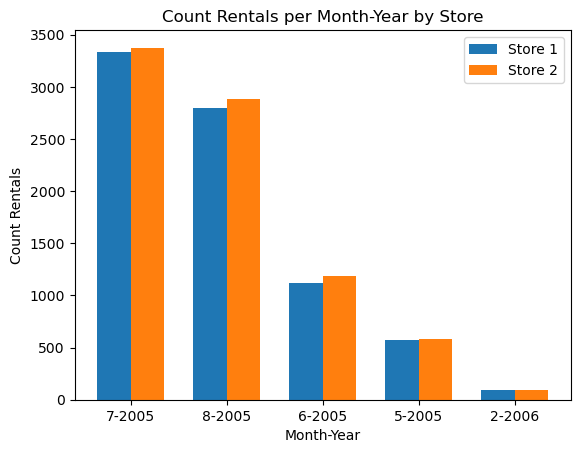

In [54]:
x = np.arange(len(df_q3_store1))

# Plotting bars for store 1
plt.bar(x, df_q3_store1['count_rentals'],width=0.35, label='Store 1')

# Plotting bars for store 2
plt.bar(x + 0.35, df_q3_store2['count_rentals'], width=0.35, label='Store 2')

# Adding labels and title
plt.xlabel('Month-Year')
plt.ylabel('Count Rentals')
plt.title('Count Rentals per Month-Year by Store')

plt.xticks(x + 0.35 / 2,df_q3_store1['rental_month'].astype(str) + '-' + df_q3_store1['rental_year'].astype(str))

# Adding legend
plt.legend()

plt.show()

## Plotting for query 4


In [55]:
customers = df_q4['customer_name'].unique()

In [56]:
df_q4['payment_month'] = pd.to_datetime(df_q4['payment_month'])
df_q4['payment_month'] = df_q4['payment_month'].dt.strftime('%B')

In [57]:
new_df = df_q4.drop(columns=['num_payments'])  # Remove num of payments

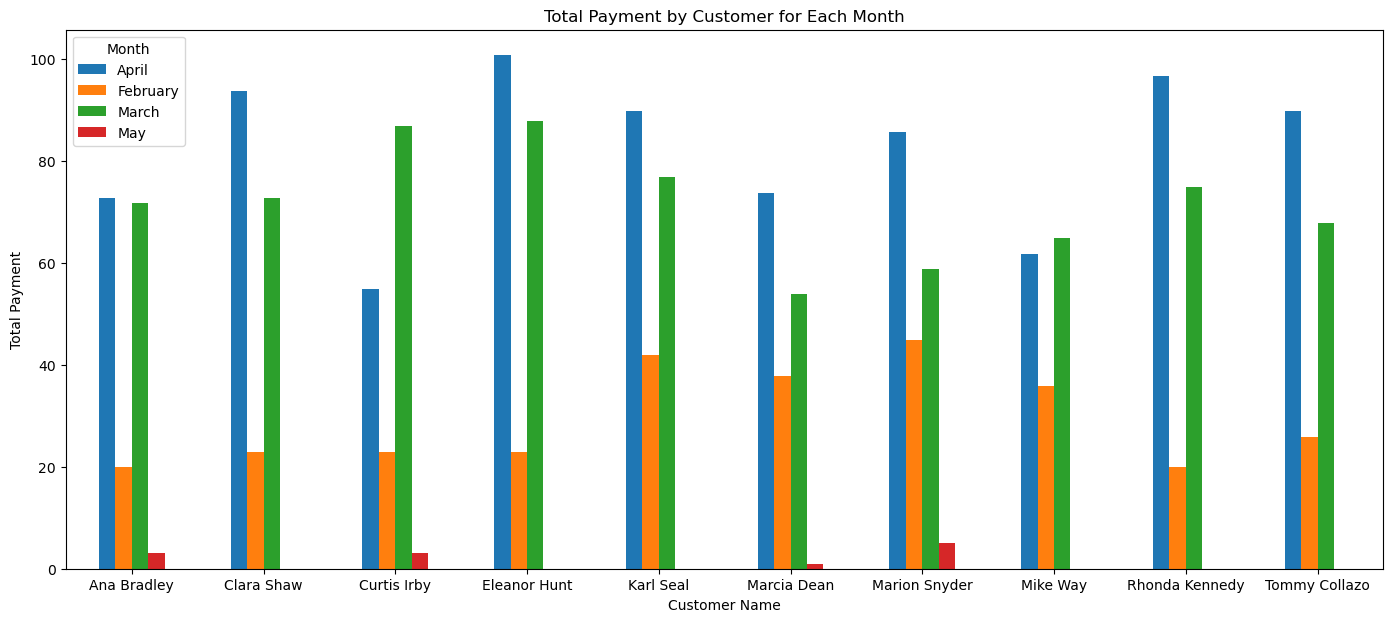

In [58]:
# Pivot the DataFrame to have months as columns
pivot_df = new_df.pivot(index="customer_name", columns="payment_month", values="total_payment")


# Plotting
pivot_df.plot(kind="bar", figsize=(17, 7))
plt.xlabel("Customer Name")
plt.ylabel("Total Payment")
plt.title("Total Payment by Customer for Each Month")
plt.legend(title="Month")

plt.xticks(rotation=0)  # Rotate x-axis labels to horizontal

plt.show()